<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BML%5D%20%ED%9A%8C%EA%B7%80%20%EC%8B%A4%EC%8A%B5%201.%20boston_housing_price_(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scikit-Learn을 이용한 Boston Housing Price Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [12]:
boston = pd.read_csv("/content/BostonHousing.csv")

### Exploratory Data Analysis

In [13]:
boston.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

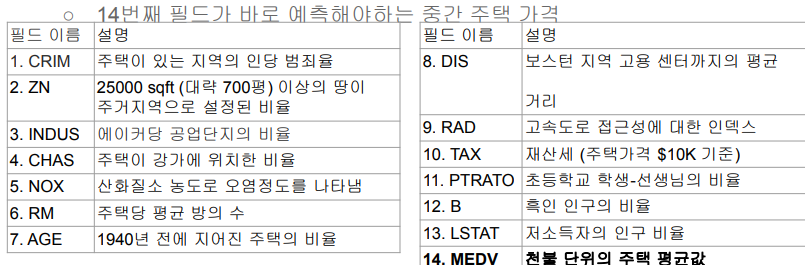

In [14]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
boston.shape

(506, 14)

### Summary Statistics

In [16]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


결측치x 모두다 수치 예~

In [18]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


상관관계가 다들 꽤 높음\
lstat : 저소득자의 비율 높을수록 집값 내려가\
rm : 주택당 평균 방의수가 많을수록 주택가격올라가\
dls: 고용센터에서 멀수록 집값 올라가

lad: 고속도로 접근성이 높을수록 집값 내려감


In [19]:
X = boston.drop('medv', axis = 1)
Y = boston['medv']

### Split train-test dataset

In [20]:
import sklearn.model_selection

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


67:33\
random state 를 주면 동일한 환경 구성이 될수있음 .!

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

스케일링을 안한경우!

Text(0.5, 1.0, 'Prices vs Predicted prices')

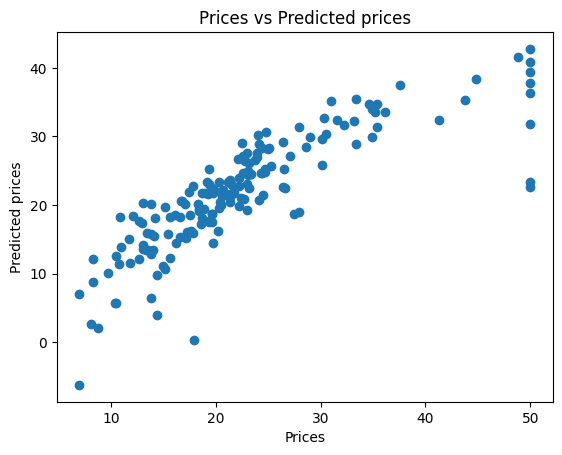

In [24]:
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
#x축 :실제값 y축 :예측값 !
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

일직선 ! 모델이 어느정도 동작하네!

### Mean Squared Error

1P : 정답 2P:에측값

In [25]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.530458765974643


RMSE!!! MSE 에 루트 씌워

In [26]:
from math import sqrt

sqrt(mse)

5.34139108903052

작을수록 좋음

13개의 파라미터마다 가중치가 있음!

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]


y절편 출력

In [ ]:
print('Coefficients: \n', lm.intercept_)

Coefficients: 
 32.858932634086024


스케일링을 해보자!

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [28]:
X_train[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
242,0.10290,30.0,4.93,0,0.428,6.358,52.9,7.0355,6,300,16.6,372.75,11.22
461,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65


In [29]:
X_train_scaled[:5]

array([[1.25323553e-01, 0.00000000e+00, 6.36089090e-01, 0.00000000e+00,
        7.30452675e-01, 5.87852079e-01, 9.44387230e-01, 1.04532899e-01,
        1.00000000e+00, 9.13957935e-01, 8.08510638e-01, 2.72148689e-01,
        5.94370861e-01],
       [5.13009351e-04, 0.00000000e+00, 8.15402039e-02, 0.00000000e+00,
        2.13991770e-01, 6.60279747e-01, 8.58908342e-01, 2.41800459e-01,
        4.34782609e-02, 1.56787763e-01, 5.53191489e-01, 1.00000000e+00,
        1.04028698e-01],
       [5.10863569e-02, 0.00000000e+00, 6.36089090e-01, 0.00000000e+00,
        6.85185185e-01, 0.00000000e+00, 8.75386200e-01, 5.03984675e-02,
        1.00000000e+00, 9.13957935e-01, 8.08510638e-01, 8.92996602e-01,
        1.48730684e-01],
       [1.03343733e-03, 3.00000000e-01, 1.38920347e-01, 0.00000000e+00,
        8.84773663e-02, 5.35926423e-01, 5.14933059e-01, 6.24265772e-01,
        2.17391304e-01, 2.14149140e-01, 4.25531915e-01, 9.38764643e-01,
        2.61865342e-01],
       [4.13886367e-02, 0.00000000e+

In [30]:
lm = LinearRegression()
lm.fit(X_train_scaled, Y_train)

LinearRegression()

스케일링을 테스트에도적용 ! ->일관성

In [31]:
X_test_scaled = scaler.transform(X_test)

In [32]:
y_pred_scaled = lm.predict(X_test_scaled)

In [33]:
mse = sklearn.metrics.mean_squared_error(Y_test, y_pred_scaled)
print(mse)

28.530458765974608


In [35]:
from math import sqrt

sqrt(mse)

5.341391089030517

스케일링 해도 비슷함... ! 스케일링한다해서 더나아지지않다

오버피팅 막아줌 ! Ridge -
테스트 데이터 성능은 안좋게 나올수도있음 오버피팅 방지니까 하지만 새로운데이터에서는 좋음

In [34]:
from sklearn.linear_model import Ridge

r = Ridge()
r.fit(X_train_scaled, Y_train)

Ridge()

In [36]:
y_r = r.predict(X_test_scaled)

In [37]:
sklearn.metrics.mean_squared_error(Y_test, y_r)

28.72693525598721

28.530458765974608, 보다 살짝 높게나옴 -> 성능이 살짝 떨어짐..!